# Importing important libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import glob

C:\Users\Devashi Jain\DMG\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Devashi Jain\DMG\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Devashi Jain\DMG\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Devashi Jain\DMG\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: P

# Initializing the variables

In [2]:
EPOCHS = 10
BS = 32
imagePaths = glob.glob("Face_Mask_Detection/dataset/*/*")
data = []
labels = []

# Reading and processing the the data and storing it

In [3]:
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)
    labels.append(label)

C:\Users\Devashi Jain\DMG\lib\site-packages\PIL\Image.py:930: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


In [4]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [5]:
data.shape

(3833, 224, 224, 3)

In [6]:
labels.shape

(3833,)

In [8]:
labels[0]

'without_mask'

# One hot encoding of labels

In [9]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [10]:
labels[0]

array([0., 1.], dtype=float32)

# Train and Test Split of data

In [17]:
trainData, testData, trainLabel, testLabel = train_test_split(data, labels, test_size = 0.1)

# Creating a CNN model

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Conv2D(200, (3, 3), input_shape = data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(100, (3, 3), input_shape = data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Compile our model

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
checkpoint = ModelCheckpoint('model/m-{epoch:03d}.model', monitor = 'val_loss', verbose = 0, save_best_only = True)


# Train the network

In [18]:
history = model.fit(trainData, trainLabel, epochs = EPOCHS,  callbacks = [checkpoint], validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 2759 samples, validate on 690 samples
Epoch 1/10
2759/2759 [==============================] - 1336s 484ms/step - loss: 0.4168 - acc: 0.8695 - val_loss: 0.1913 - val_acc: 0.9362
Epoch 2/10
2759/2759 [==============================] - 1296s 470ms/step - loss: 0.1767 - acc: 0.9377 - val_loss: 0.2047 - val_acc: 0.9319
Epoch 3/10
2759/2759 [==============================] - 1186s 430ms/step - loss: 0.1349 - acc: 0.9482 - val_loss: 0.1538 - val_acc: 0.9536
Epoch 4/10
2759/2759 [==============================] - 1123s 407ms/step - loss: 0.1088 - acc: 0.9616 - val_loss: 0.1725 - val_acc: 0.9391
Epoch 5/10
2759/2759 [==============================] - 1107s 401ms/step - loss: 0.0796 - acc: 0.9743 - val_loss: 0.1483 - val_acc: 0.9406
Epoch 6/10
2759/2759 [==============================] - 1115s 404ms/step - loss: 0.0682 - acc: 0.9739 - val_loss: 0.2067 - val_acc: 0.9449
Epoch 7/10
2759/2759 [==============================] - 1137s 412ms/ste

# Make predictions on the testing set and show classification report and save model

In [34]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testData, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testLabel.argmax(axis=1), predIdxs, target_names=lb.classes_))
print("[INFO] saving mask detector model...")
model.save_weights("model.h5")


[INFO] evaluating network...
              precision    recall  f1-score   support

   with_mask       0.96      0.97      0.96       176
without_mask       0.98      0.96      0.97       208

    accuracy                           0.97       384
   macro avg       0.97      0.97      0.97       384
weighted avg       0.97      0.97      0.97       384

[INFO] saving mask detector model...


# Plot the training loss and accuracy

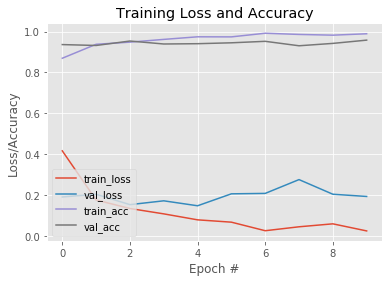

In [23]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")